# HW 1

---


- $\displaystyle \th{(x)}$
- $\displaystyle h_n = \frac{1}{1.25^n}$

## Formulas
- $\displaystyle \frac{f(x + h) - f(x)}{h}$

- $\displaystyle \frac{f(x + h) - f(x - h)}{2h}$

- $\displaystyle \frac{3f(x) - 4f(x - h) + f(x - 2h)}{2h}$

In [121]:
import numpy as np
from matplotlib import pyplot as plt

In [122]:
class Function:
    def __init__(self, func, derivative, name):
        self.func_ = func
        self.derivative_ = derivative
        self.name_ = name

class Num_Derivative:
    def __init__(self, func, name, color):
        self.func_ = func
        self.name_ = name
        self.color_ = color

In [123]:
def numerical_derivative_1 (f, x, h):
    return (f(x + h) - f(x)) / h

def numerical_derivative_2 (f, x, h):
    return (f(x + h) - f(x - h)) / (2 * h)

def numerical_derivative_3 (f, x, h):
    return (3*f(x) - 4*f(x - h) + f(x - 2*h)) / (2 * h)

derivatives_list = [Num_Derivative(numerical_derivative_1,
                                   "$\\frac{f(x + h) - f(x)}{h}$",
                                   "red"),
                    Num_Derivative(numerical_derivative_2,
                                   "$\\frac{f(x + h) - f(x - h)}{2h}$",
                                   "blue"),
                    Num_Derivative(numerical_derivative_3,
                                   "$\\frac{3f(x) - 4f(x - h) + f(x - 2h)}{2h}$",
                                   "green")]

In [124]:
n = np.arange(150, dtype=np.float64) 
h = 1 / np.power((1.25), n) 
x_0 = 0.5

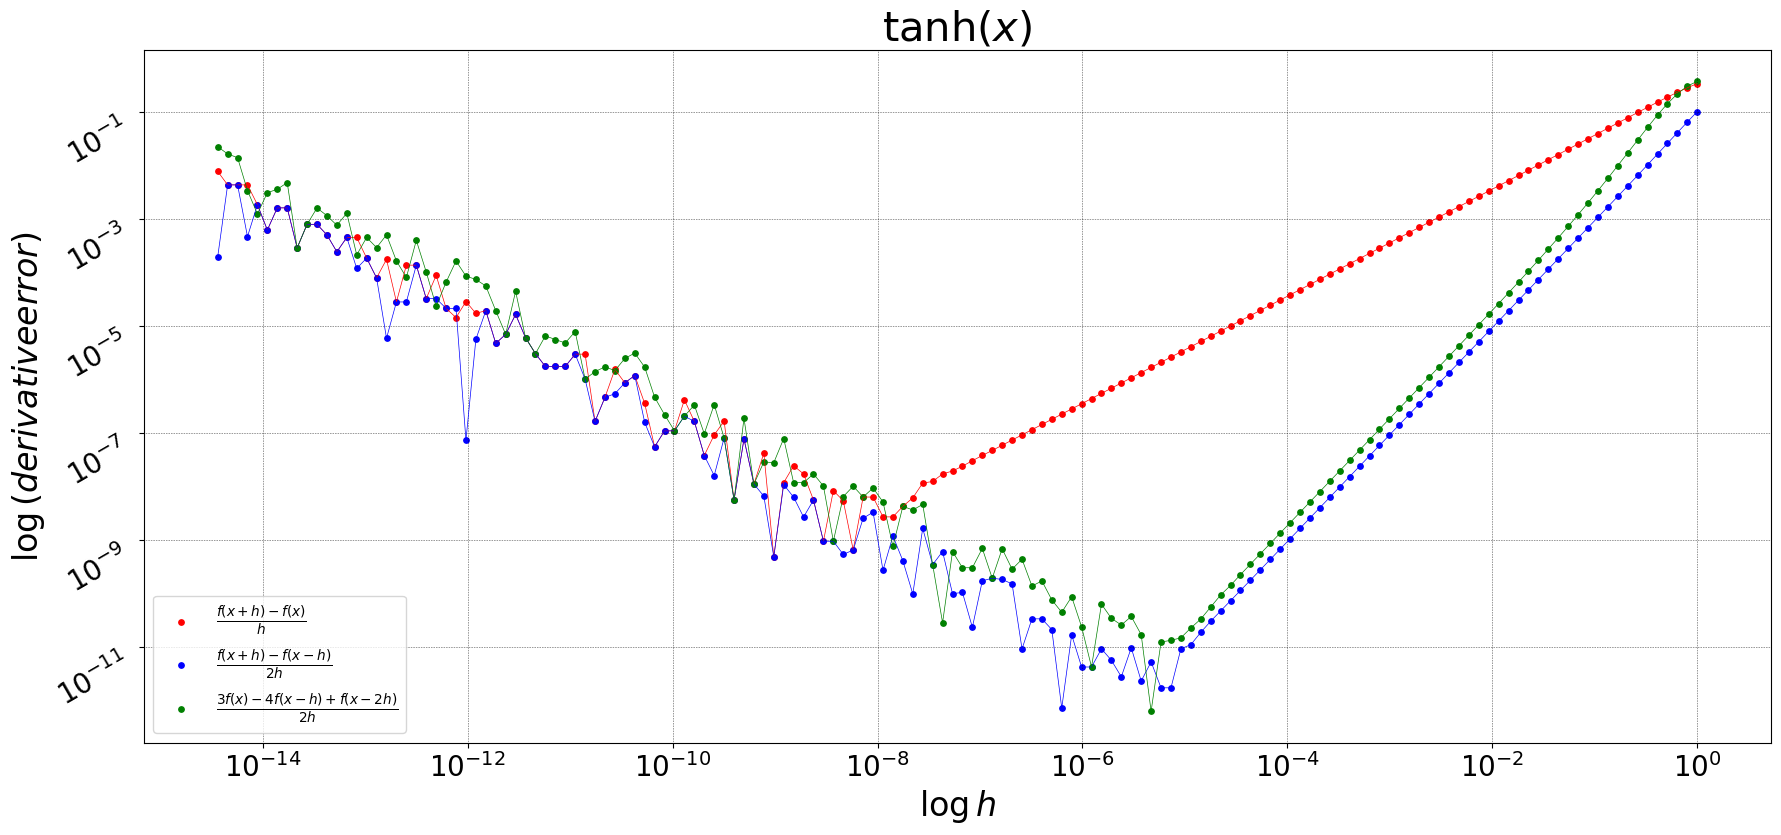

In [125]:
func = Function(lambda x: np.tanh(x),
                lambda x: 1 / (np.cosh(x)**2),
                "$\\tanh(x)$")

plt.figure (figsize = (21, 9), dpi = 100)
plt.title(func.name_, fontsize=30)

plt.xscale("log")
plt.yscale("log")

plt.xlabel('$\\log{h}$', fontsize = 24)
plt.xticks (fontsize = 20, ha = "center", va = "top")

plt.ylabel("$\\log{(derivative error)}$", fontsize = 24)
plt.yticks (fontsize = 20, rotation = 30, ha = "right", va = "top")

true_derivative = func.derivative_(x_0)

for derivative in derivatives_list:
    errors = []
    for step in h:
        errors.append(np.abs(derivative.func_(func.func_, x_0, step) - true_derivative))

    plt.scatter (h, errors, s = 15, color = derivative.color_, label=derivative.name_)
    plt.plot (h, errors, color=derivative.color_, linewidth = 0.5)

plt.legend (loc = "best", fontsize = 14)

plt.grid (color = "black", linewidth = 0.45, linestyle = "dotted")
plt.minorticks_on()
plt.grid (which = "minor", color = "grey", linewidth = 0.25, linestyle = "dashed")

plt.show()